# Eksploracja i preprocessing danych zbioru "Chess king rook"
Julia Kaznowska, Piotr Wilczyński <br>
Politechnika Warszawska, Wydział Matematyki i Nauk Informacyjnych, Wstęp do uczenia maszynowego

## Import niezbędnych bibliotek oraz zbioru danych

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

# zbior danych
df = pd.read_csv("chess_king_rook_dataset.csv")

# wyświetlanie wizualizacji
%matplotlib inline

Wyświetlanie wizualizacji c.d.

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Opis zbioru

Zbiór "Chess king rook" zawiera dane dotyczące końcówek meczów szachowych, w których na szachownicy zostały trzy figury: biały król, czarny król i biała wieża.

Opis kolumn znajudje się w pliku "attributes_chess_king_rook.csv"

In [3]:
attr = pd.read_csv("attributes_chess_king_rook.csv")
with pd.option_context('display.max_colwidth', 400):
    display(attr)

,name,type,description
0,white_king_file,string,Column location on the chess board of the white king
1,white_king_rank,string,Row location on the chess board of the white king
2,white_rook_file,string,Column location on the chess board of the white rook
3,white_rook_rank,string,Row location on the chess board of the white rook
4,black_king_file,string,Column location on the chess board of the black king
5,black_king_rank,string,Row location on the chess board of the black king
6,result,string,"Predictor Class. optimal depth-of-win for White in 0 to 16 moves, otherwise drawn Values: {draw, zero, one, two, ..., sixteen}"


Zobaczmy kilka pierwszych rekordów w zbiorze

In [4]:
df.head()

,white_king_file,white_king_rank,white_rook_file,white_rook_rank,black_king_file,black_king_rank,result
0,a,1,b,3,c,2,draw
1,a,1,c,1,c,2,draw
2,a,1,c,1,d,1,draw
3,a,1,c,1,d,2,draw
4,a,1,c,2,c,1,draw


Według informacji znajdujących się na stronie, na których znajdował się dane, zbiór nie powinien mieć braków. Sprawdźmy to.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28056 entries, 0 to 28055
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   white_king_file  28056 non-null  object
 1   white_king_rank  28056 non-null  int64 
 2   white_rook_file  28056 non-null  object
 3   white_rook_rank  28056 non-null  int64 
 4   black_king_file  28056 non-null  object
 5   black_king_rank  28056 non-null  int64 
 6   result           28056 non-null  object
dtypes: int64(3), object(4)
memory usage: 1.5+ MB


Zbiór nie ma braków danych

Warto zauważyć, że mimo tego iż kolumy <i>white_king_rank</i>, <i>white_rook_rank</i> oraz <i>black_king_rank</i> są reprezentowane przez liczby to przyjmują one jedynie liczby całkowite od 1 do 8. Możemy traktować je jako zmienne kategoryczne. 

## Podział zbioru na zbióry do budowania, testowania i walidacji

In [6]:
y = np.array(df["result"])
X = df.drop(["result"], axis = 1)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=123
)
X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train, stratify=y_train, test_size=0.3, random_state=123
)

In [7]:
X_train.head()

,white_king_file,white_king_rank,white_rook_file,white_rook_rank,black_king_file,black_king_rank
18628,c,2,b,6,h,4
40,a,1,e,1,d,1
16021,d,3,a,2,g,4
15738,d,2,e,2,d,6
19637,d,1,d,5,g,3


In [8]:
y_train

array(['thirteen', 'draw', 'twelve', ..., 'fourteen', 'draw', 'ten'],
      dtype=object)

In [9]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(13747, 6)
(13747,)
(5892, 6)
(5892,)
(8417, 6)
(8417,)


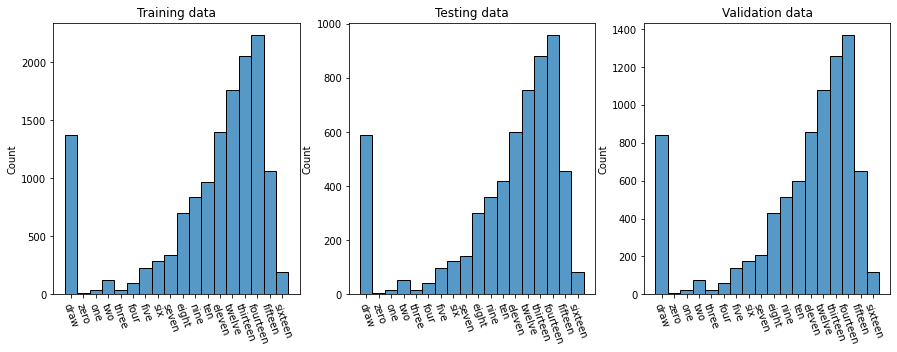

In [10]:
# set order
y_train = pd.Categorical(y_train, ["draw", "zero", "one", "two", "three", "four", "five", "six", "seven", "eight", "nine", "ten", "eleven", "twelve", "thirteen", "fourteen", "fifteen", "sixteen"])
y_test = pd.Categorical(y_test, ["draw", "zero", "one", "two", "three", "four", "five", "six", "seven", "eight", "nine", "ten", "eleven", "twelve", "thirteen", "fourteen", "fifteen", "sixteen"])
y_val = pd.Categorical(y_val, ["draw", "zero", "one", "two", "three", "four", "five", "six", "seven", "eight", "nine", "ten", "eleven", "twelve", "thirteen", "fourteen", "fifteen", "sixteen"])

# plot
fig, axes = plt.subplots(1, 3, figsize = (15, 5))
sns.histplot(y_train, ax = axes[0])
sns.histplot(y_test, ax = axes[1])
sns.histplot(y_val, ax = axes[2])
plt.sca(axes[0])
plt.xticks(rotation = -70)
plt.title("Training data")
plt.sca(axes[1])
plt.xticks(rotation = -70)
plt.title("Testing data")
plt.sca(axes[2])
plt.xticks(rotation = -70)
plt.title("Validation data")
plt.show()

Zbiór wydaje się być dobrze podzielony

W dalszej części będziemy pracować na danych treningowych i sprawdzać wyniki na danych testowych

## Wstępna eksploracja

Z racji na to, że w tej części nie będziemy jeszcze trenować modelu wygodniej będzie nam ponownie połączyć X_train i y_train w jedną ramkę (To samo dla X_test i y_test).

In [11]:
df_train = X_train
df_train['result'] = y_train
df_test = X_test
df_test['result'] = y_test

In [12]:
df_train.head()

,white_king_file,white_king_rank,white_rook_file,white_rook_rank,black_king_file,black_king_rank,result
18628,c,2,b,6,h,4,thirteen
40,a,1,e,1,d,1,draw
16021,d,3,a,2,g,4,twelve
15738,d,2,e,2,d,6,twelve
19637,d,1,d,5,g,3,thirteen


### Pozycje białego króla

Przeanalizujmy częstość występowania danych pól dla każdej z figur.

In [13]:
df_white_king = df_train[["white_king_file", 'white_king_rank', 'result']]
df_white_king = df_train.pivot_table(index = "white_king_rank",\
                                          columns ='white_king_file',\
                                          values = "result",\
                                          aggfunc='count',\
                                          fill_value = '0')
df_white_king

white_king_file,a,b,c,d
white_king_rank,,,,
1,899.0,1763.0,1736.0,1774.0
2,0,858.0,1640.0,1712.0
3,0,0,874.0,1663.0
4,0,0,0,828.0


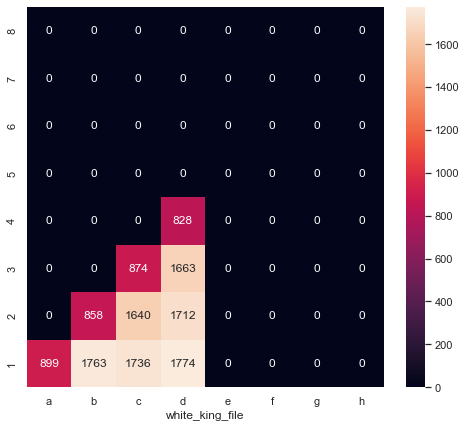

In [14]:
df_white_king[["e","f","g","h"]] = [0,0,0,0]
df_white_king = pd.concat([df_white_king, df_white_king], axis=0, ignore_index=True)
df_white_king.index +=1
df_white_king.iloc[4:8,0:4] = np.zeros([4,4])
df_white_king = df_white_king.astype(int)

sns.set(rc = {'figure.figsize':(8,7)})
g = sns.heatmap(df_white_king, annot=True, fmt="d")
g.invert_yaxis()

Wnioski:
- Biały król występuje tylko na trójkącie prostokątnym (a1, d1, d4)
- Występuje około dwa razy rzadziej na przeciwprostokątnej

#### Sprawdzenie dla danych testowych

In [15]:
df_white_king_test = df_test[["white_king_file", 'white_king_rank', 'result']]
df_white_king_test = df_test.pivot_table(index = "white_king_rank",\
                                          columns ='white_king_file',\
                                          values = "result",\
                                          aggfunc='count',\
                                          fill_value = '0')
df_white_king_test

white_king_file,a,b,c,d
white_king_rank,,,,
1,420.0,745.0,786.0,774.0
2,0,352.0,691.0,693.0
3,0,0,346.0,700.0
4,0,0,0,385.0


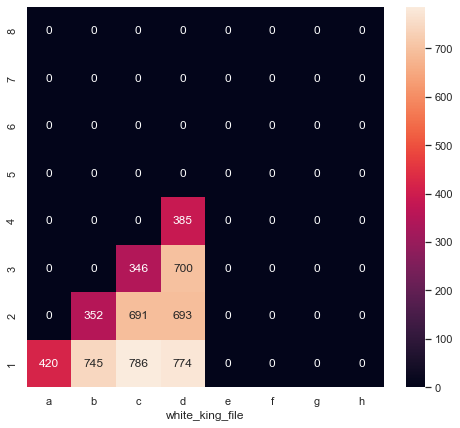

In [16]:
df_white_king_test[["e","f","g","h"]] = [0,0,0,0]
df_white_king_test = pd.concat([df_white_king_test, df_white_king_test], axis=0, ignore_index=True)
df_white_king_test.index +=1
df_white_king_test.iloc[4:8,0:4] = np.zeros([4,4])
df_white_king_test = df_white_king_test.astype(int)

sns.set(rc = {'figure.figsize':(8,7)})
g = sns.heatmap(df_white_king_test, annot=True, fmt="d")
g.invert_yaxis()

Wnioski się zgadzają (a1 występuje trochę częściej ale wydaje się to być statystycznie nieistotne). Biały król występuje tylko na trójkącie prostokątnym (a1, d1, d4) oraz występuje około dwa razy rzadziej na przeciwprostokątnej

### Pozycje białej wieży

In [17]:
df_white_rook = df_train[["white_rook_file", 'white_rook_rank', 'result']]
df_white_rook = df_train.pivot_table(index = "white_rook_rank",\
                                          columns ='white_rook_file',\
                                          values = "result",\
                                          aggfunc='count',\
                                          fill_value = '0')
df_white_rook

white_rook_file,a,b,c,d,e,f,g,h
white_rook_rank,,,,,,,,
1,202,209,188,196,232,220,210,203
2,203,211,192,195,204,235,250,221
3,215,231,210,188,220,203,213,232
4,215,211,210,186,213,244,224,215
5,233,221,190,228,219,235,225,213
6,186,231,204,228,198,229,228,204
7,225,205,206,230,219,202,225,211
8,218,214,222,215,227,217,215,223


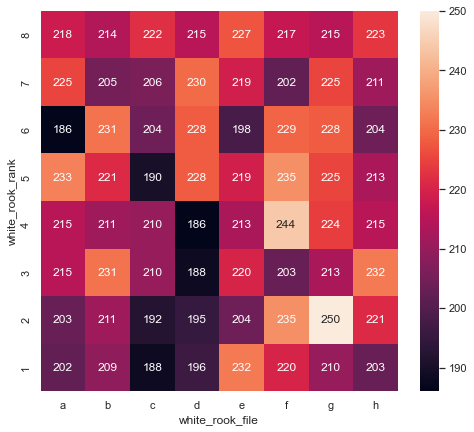

In [18]:
df_white_rook = df_white_rook.astype(int)
sns.set(rc = {'figure.figsize':(8,7)})
g = sns.heatmap(df_white_rook, annot=True, fmt="d")
g.invert_yaxis()
plt.show()

Wnioski:
- Biała wieża występuje mniej więcej z równą częstością na każdym polu. Rozstęp wynosi 250 - 186 = 64

#### Sprawdzenie dla danych testowych

In [19]:
df_white_rook_test = df_test[["white_rook_file", 'white_rook_rank', 'result']]
df_white_rook_test = df_test.pivot_table(index = "white_rook_rank",\
                                          columns ='white_rook_file',\
                                          values = "result",\
                                          aggfunc='count',\
                                          fill_value = '0')
df_white_rook_test

white_rook_file,a,b,c,d,e,f,g,h
white_rook_rank,,,,,,,,
1,81,88,90,68,87,97,103,92
2,93,84,86,90,106,78,89,93
3,91,99,91,85,109,110,114,103
4,93,100,100,83,101,84,94,89
5,74,106,92,78,92,91,98,80
6,90,83,104,90,98,82,94,96
7,79,106,93,76,86,94,95,93
8,90,103,90,85,92,99,94,98


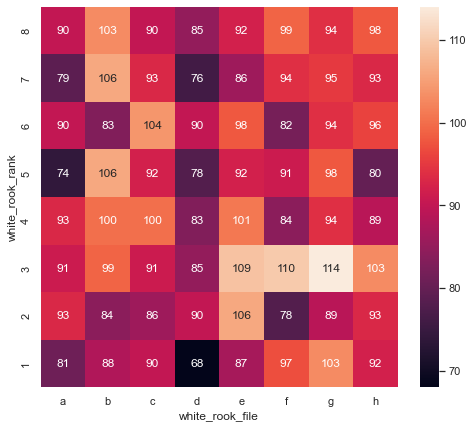

In [20]:
df_white_rook_test = df_white_rook_test.astype(int)
sns.set(rc = {'figure.figsize':(8,7)})
g = sns.heatmap(df_white_rook_test, annot=True, fmt="d")
g.invert_yaxis()

Wieża występuję na każdym polu z mniej więcej tą samą częstością. Wniosek wydaje się być prawdziwy.

### Pozycje czarnego króla

In [21]:
df_black_king = df_train[["black_king_file", 'black_king_rank', 'result']]
df_black_king = df_train.pivot_table(index = "black_king_rank",\
                                          columns ='black_king_file',\
                                          values = "result",\
                                          aggfunc='count',\
                                          fill_value = '0')
df_black_king

black_king_file,a,b,c,d,e,f,g,h
black_king_rank,,,,,,,,
1,189,154,129,180,255,300,314,327
2,142,108,56,110,205,302,299,303
3,175,149,106,137,209,307,309,299
4,174,186,156,171,239,317,315,315
5,181,184,189,186,234,310,322,319
6,183,189,174,177,180,254,314,292
7,178,188,187,160,174,174,237,307
8,184,172,191,186,187,179,188,230


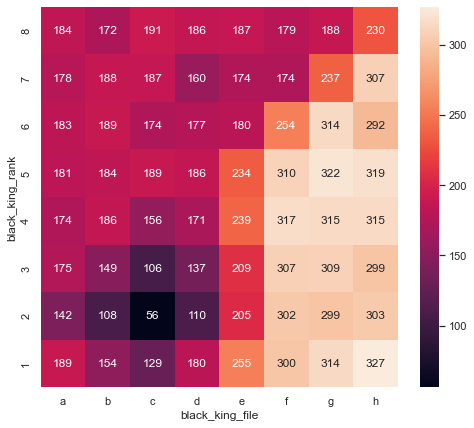

In [22]:
df_black_king = df_black_king.astype(int)
sns.set(rc = {'figure.figsize':(8,7)})
g = sns.heatmap(df_black_king, annot=True, fmt="d")
g.invert_yaxis()

Wnioski:
- czarny król występuje częściej po prawej stronie (w kolumnach e-h)
- czarny król występuje wyjątkowo rzadko na polu c2

#### Sprawdzenie dla danych testowych

In [23]:
df_black_king_test = df_test[["black_king_file", 'black_king_rank', 'result']]
df_black_king_test = df_test.pivot_table(index = "black_king_rank",\
                                          columns ='black_king_file',\
                                          values = "result",\
                                          aggfunc='count',\
                                          fill_value = '0')
df_black_king_test

black_king_file,a,b,c,d,e,f,g,h
black_king_rank,,,,,,,,
1,74,65,51,77,95,120,130,125
2,63,49,30,53,106,138,124,124
3,82,66,46,57,91,130,130,138
4,82,81,57,91,107,126,122,124
5,77,80,81,79,94,136,123,133
6,80,86,79,81,63,104,126,151
7,86,86,78,75,79,80,103,139
8,74,76,67,68,64,83,83,124


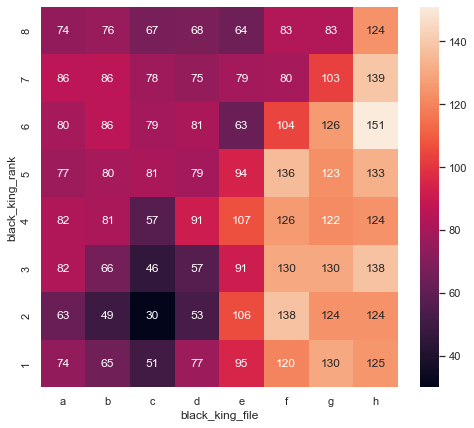

In [24]:
df_black_king_test = df_black_king_test.astype(int)
sns.set(rc = {'figure.figsize':(8,7)})
g = sns.heatmap(df_black_king_test, annot=True, fmt="d")
g.invert_yaxis()

Czarny król występuje zdecydowanie częściej po prawej stronie. Dodatkowo występuje wyjątkowo rzadko na polu c3. Wnioski wydają się być prawdziwe.

## Analiza zależności